In [1]:
import cv2
import numpy as np
import timeit

In [2]:
def apply_yolo_object_detection(image_to_process):
    """
    Recognition and determination of the coordinates of objects on the image
    :param image_to_process: original image
    :return: image with marked objects and captions to them
    """

    height, width, _ = image_to_process.shape
    blob = cv2.dnn.blobFromImage(image_to_process, 1 / 255, (608, 608),
                                 (0, 0, 0), swapRB=True, crop=False)
    net.setInput(blob)
    outs = net.forward(out_layers)
    class_indexes, class_scores, boxes = ([] for i in range(3))
    objects_count = 0

    # Starting a search for objects in an image
    for out in outs:
        for obj in out:
            scores = obj[5:]
            class_index = np.argmax(scores)
            class_score = scores[class_index]
            if class_score > 0:
                center_x = int(obj[0] * width)
                center_y = int(obj[1] * height)
                obj_width = int(obj[2] * width)
                obj_height = int(obj[3] * height)
                box = [center_x - obj_width // 2, center_y - obj_height // 2,
                       obj_width, obj_height]
                boxes.append(box)
                class_indexes.append(class_index)
                class_scores.append(float(class_score))

    # Selection
    chosen_boxes = cv2.dnn.NMSBoxes(boxes, class_scores, 0.0, 0.4)
    for box_index in chosen_boxes:
        box_index = box_index
        box = boxes[box_index]
        class_index = class_indexes[box_index]

        # For debugging, we draw objects included in the desired classes
        if classes[class_index] in classes_to_look_for:
            objects_count += 1
            image_to_process = draw_object_bounding_box(image_to_process,
                                                        class_index, box)

    final_image = draw_object_count(image_to_process, objects_count)
    return final_image

In [3]:
def draw_object_bounding_box(image_to_process, index, box):
    """
    Drawing object borders with captions
    :param image_to_process: original image
    :param index: index of object class defined with YOLO
    :param box: coordinates of the area around the object
    :return: image with marked objects
    """

    x, y, w, h = box
    start = (x, y)
    end = (x + w, y + h)
    color = (0, 255, 0)
    width = 2
    final_image = cv2.rectangle(image_to_process, start, end, color, width)

    start = (x, y - 10)
    font_size = 1
    font = cv2.FONT_HERSHEY_SIMPLEX
    width = 2
    text = classes[index]
    final_image = cv2.putText(final_image, text, start, font,
                              font_size, color, width, cv2.LINE_AA)

    return final_image

In [4]:
def draw_object_count(image_to_process, objects_count):
    """
    Signature of the number of found objects in the image
    :param image_to_process: original image
    :param objects_count: the number of objects of the desired class
    :return: image with labeled number of found objects
    """

    start = (10, 120)
    font_size = 1.5
    font = cv2.FONT_HERSHEY_SIMPLEX
    width = 3
    text = "Objects found: " + str(objects_count)

    # Text output with a stroke
    # (so that it can be seen in different lighting conditions of the picture)
    white_color = (255, 255, 255)
    black_outline_color = (0, 0, 0)
    final_image = cv2.putText(image_to_process, text, start, font, font_size,
                              black_outline_color, width * 3, cv2.LINE_AA)
    final_image = cv2.putText(final_image, text, start, font, font_size,
                              white_color, width, cv2.LINE_AA)

    return final_image

In [5]:
def start_image_object_detection(img_path):
    """
    Image analysis
    """

    try:
        # Applying Object Recognition Techniques in an Image by YOLO
        image = cv2.imread(img_path)
        image = apply_yolo_object_detection(image)
#         # Displaying the processed image on the screen
        cv2.imshow("Image", image)
        if cv2.waitKey(0):
            cv2.destroyAllWindows()

    except KeyboardInterrupt:
        pass

In [ ]:
if __name__ == '__main__':
  	# Loading YOLO scales from files and setting up the network
    net = cv2.dnn.readNetFromDarknet("Resources/yolov4-tiny.cfg",
                                     "Resources/yolov4-tiny.weights")
    layer_names = net.getLayerNames()
    out_layers_indexes = net.getUnconnectedOutLayers()
    out_layers = [layer_names[index - 1] for index in out_layers_indexes]

    # Loading from a file of object classes that YOLO can detect
    with open("Resources/coco.names.txt") as file:
        classes = file.read().split("\n")

    # Determining classes that will be prioritized for search in an image
    # The names are in the file coco.names.txt

    image = "cars.png"
    look_for = input("What we are looking for: ").split(',')
    
    # Delete spaces
    list_look_for = []
    for look in look_for:
        list_look_for.append(look.strip())

    classes_to_look_for = list_look_for

    start_image_object_detection(image)

What we are looking for: car


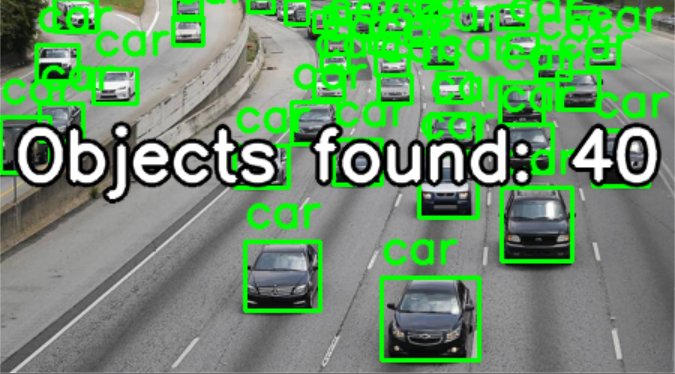